In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import acf,pacf,adfuller
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import keras
import tensorflow
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.datasets import mnist
from keras.optimizers import RMSprop,Adam
from tensorflow.keras.layers import LSTM,Bidirectional

In [2]:
# from google.colab import files
# uploaded=files.upload()

In [3]:
data=pd.read_excel("Company stock prices.xlsx")

In [4]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-19,537.070007,541.799988,525.380005,530.719971,530.719971,7567500
1,2020-10-20,528.140015,533.780029,522.260010,525.419983,525.419983,10047200
2,2020-10-21,501.029999,506.850006,488.250000,489.049988,489.049988,17405700
3,2020-10-22,494.690002,495.140015,482.000000,485.230011,485.230011,6997900
4,2020-10-23,488.109985,490.059998,481.350006,488.279999,488.279999,4927900
...,...,...,...,...,...,...,...
748,2023-10-10,385.579987,388.700012,372.250000,373.320007,373.320007,7288900
749,2023-10-11,372.779999,377.809998,365.339996,365.929993,365.929993,9151400
750,2023-10-12,366.480011,368.829987,359.049988,361.200012,361.200012,7376100
751,2023-10-13,355.640015,358.929993,352.049988,355.679993,355.679993,6312600


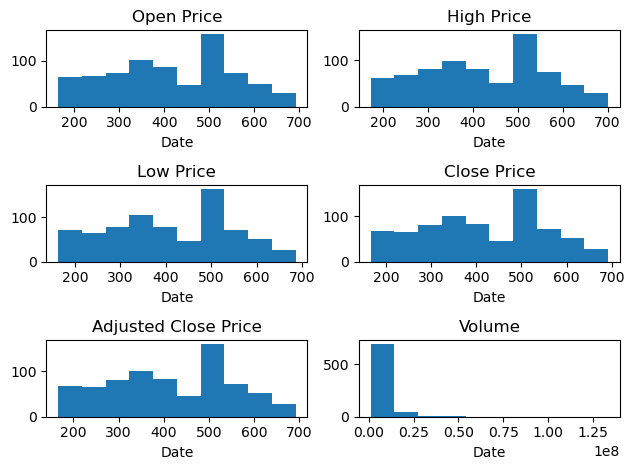

In [5]:
# Open
plt.subplot(3, 2, 1)
plt.hist(data['Open'])
plt.title('Open Price')
plt.xlabel('Date')

# High
plt.subplot(3, 2, 2)
plt.hist(data['High'])
plt.title('High Price')
plt.xlabel('Date')

# Low
plt.subplot(3, 2, 3)
plt.hist(data['Low'])
plt.title('Low Price')
plt.xlabel('Date')

# Close
plt.subplot(3, 2, 4)
plt.hist(data['Close'])
plt.title('Close Price')
plt.xlabel('Date')

# Adj Close
plt.subplot(3, 2, 5)
plt.hist(data['Adj Close'])
plt.title('Adjusted Close Price')
plt.xlabel('Date')

# Volume
plt.subplot(3, 2, 6)
plt.hist(data['Volume'])
plt.title('Volume')
plt.xlabel('Date')

plt.tight_layout()
plt.show()

In [6]:
df=data[['Date','Close']]

In [7]:
df

,Date,Close
0,2020-10-19,530.719971
1,2020-10-20,525.419983
2,2020-10-21,489.049988
3,2020-10-22,485.230011
4,2020-10-23,488.279999
...,...,...
748,2023-10-10,373.320007
749,2023-10-11,365.929993
750,2023-10-12,361.200012
751,2023-10-13,355.679993


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    753 non-null    datetime64[ns]
 1   Close   753 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.9 KB


In [9]:
df.describe()

,Close
count,753.000000
mean,414.796653
std,134.669664
min,166.369995
25%,313.480011
50%,416.029999
75%,519.780029
max,691.690002


<Axes: >

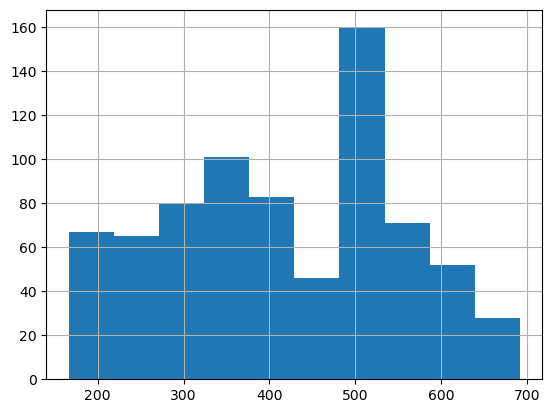

In [10]:
df['Close'].hist()

#### In most of the times the stock will closed at 500

In [11]:
df.set_index('Date',inplace=True)

In [12]:
df

,Close
Date,
2020-10-19,530.719971
2020-10-20,525.419983
2020-10-21,489.049988
2020-10-22,485.230011
2020-10-23,488.279999
...,...
2023-10-10,373.320007
2023-10-11,365.929993
2023-10-12,361.200012


<Axes: xlabel='Date'>

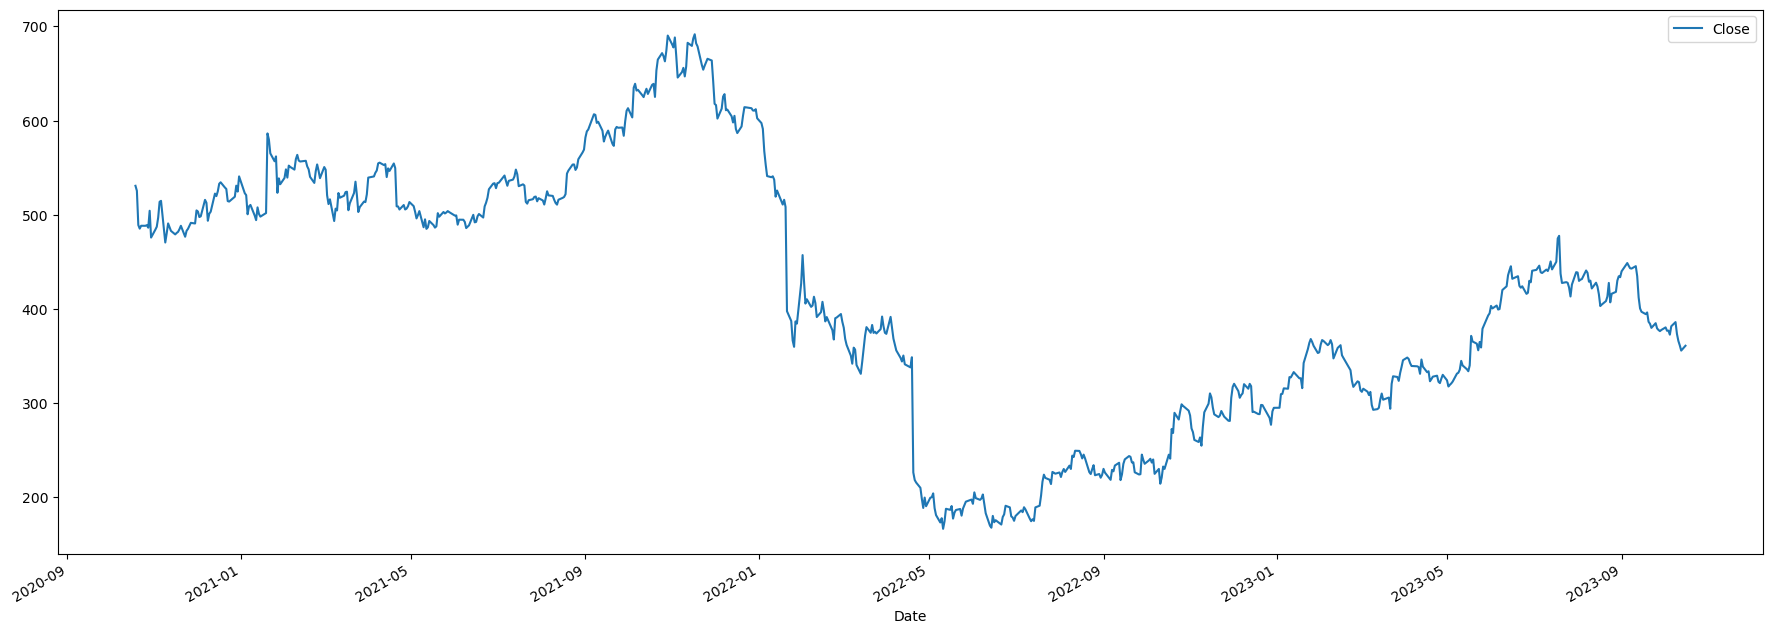

In [13]:
df.plot(figsize=(22,8))

In [14]:
result=seasonal_decompose(df['Close'],model='multiplicative',period=22)

#### Here period=22 is given because in index the date is not continuous. In a week only 5 days are trading period,in a month approximately 20-22 days are trading period

<Axes: xlabel='Date'>

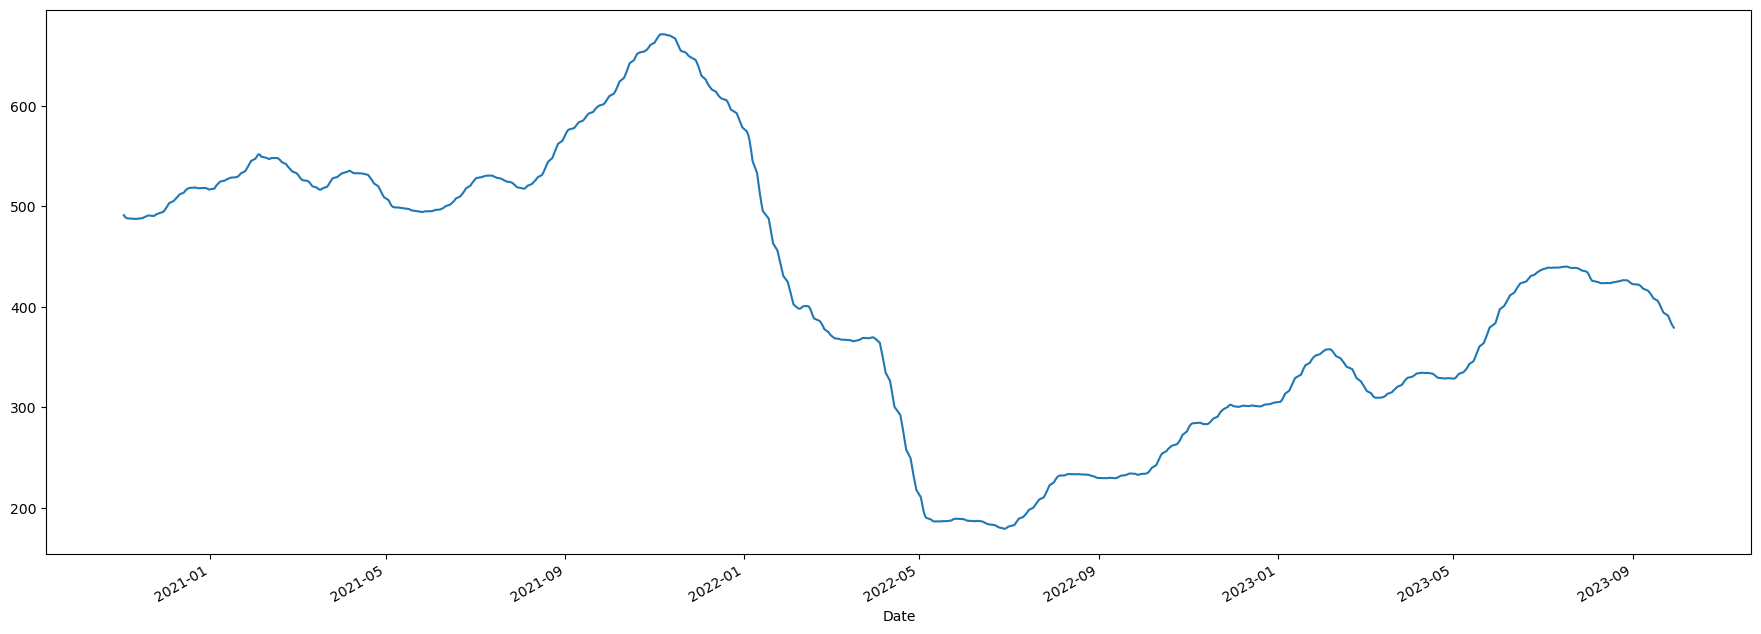

In [15]:
result.trend.plot(figsize=(22,8))

#### Here the trend is decreasing

# 

<Axes: xlabel='Date'>

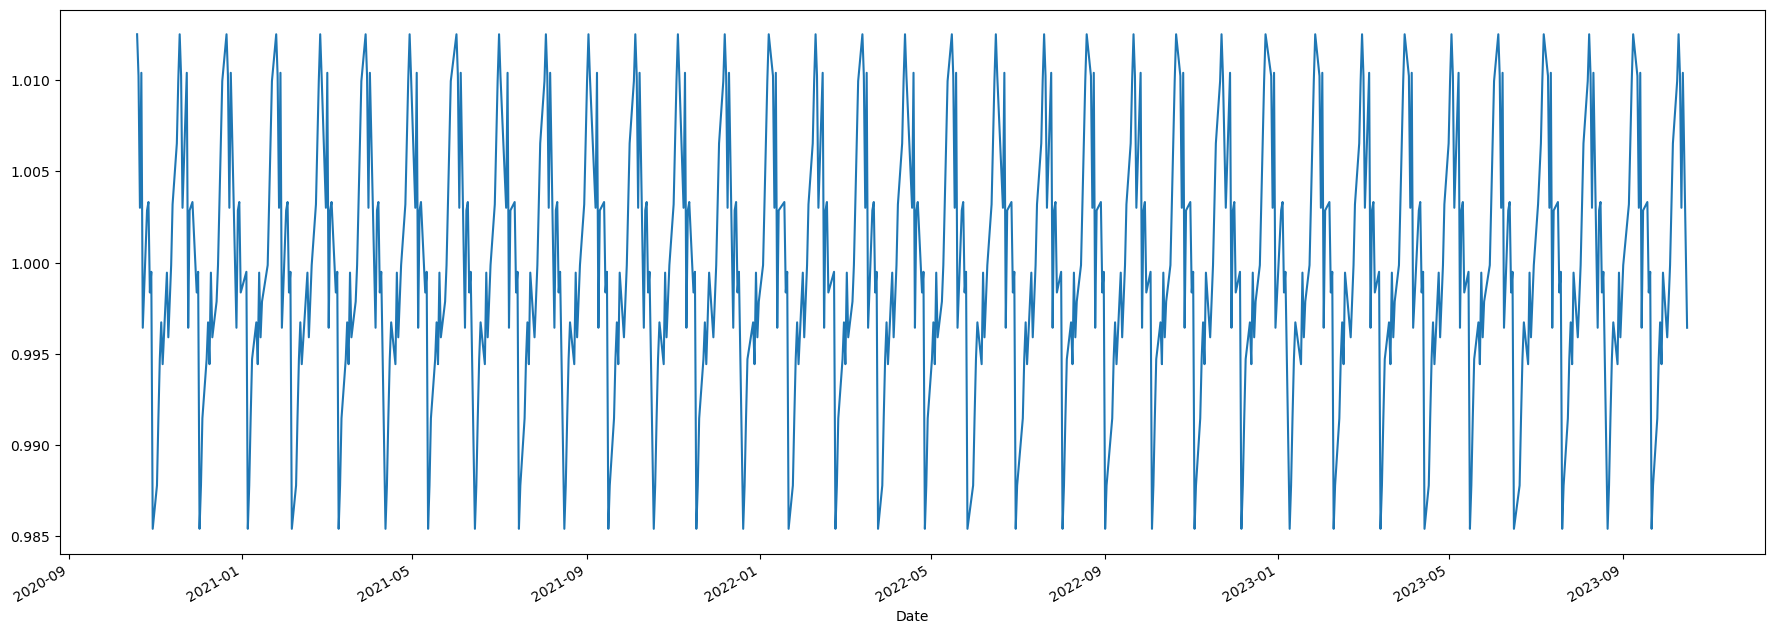

In [16]:
result.seasonal.plot(figsize=(22,8))

#### Data is Seasonal

#

<Axes: xlabel='Date'>

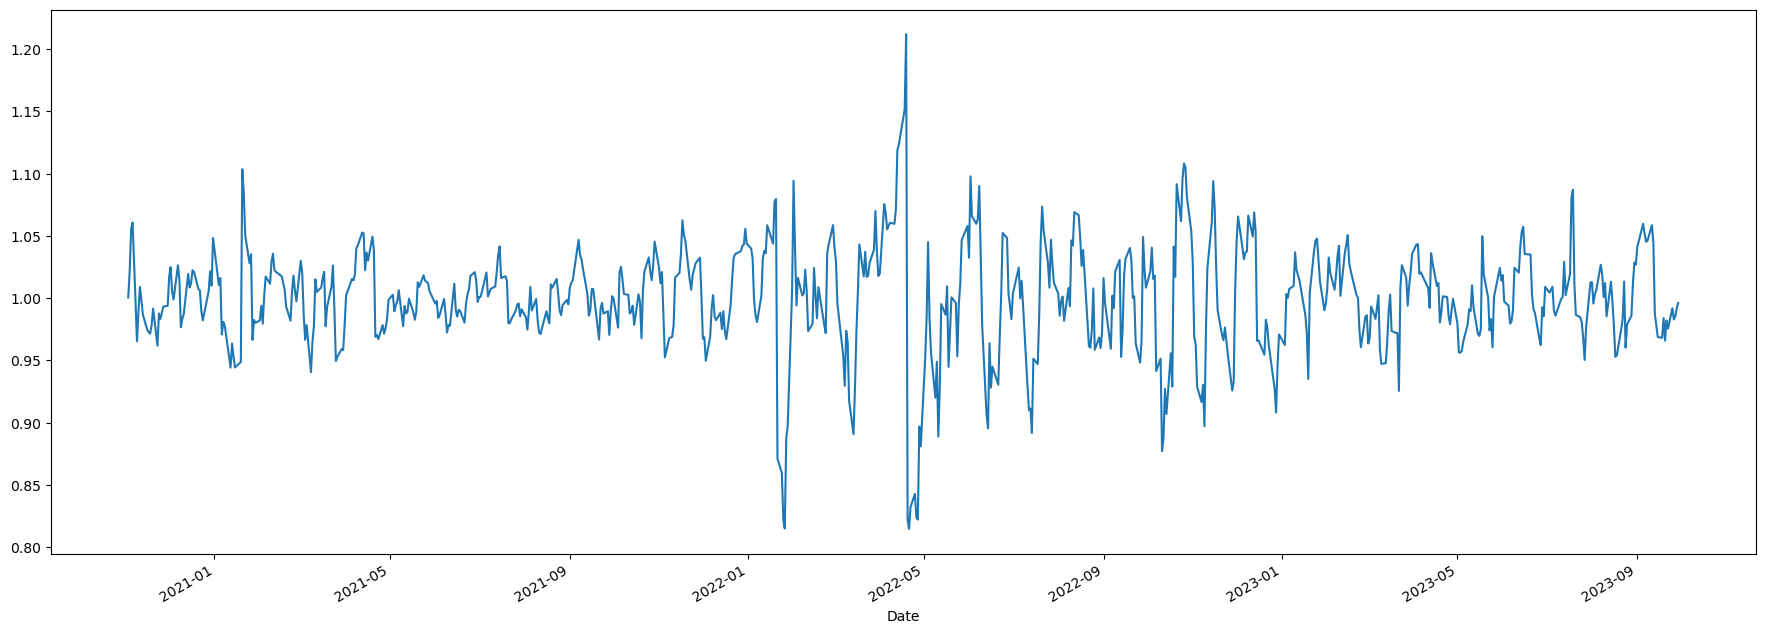

In [17]:
result.resid.plot(figsize=(22,8))

#### Data contain some noise in the year 2022

#

##  Bi directional LSTM

In [18]:
len(df)

753

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
min_max=MinMaxScaler()

In [21]:
df1=min_max.fit_transform(np.array(df))

In [22]:
df1

array([[0.69357719],
       [0.68348813],
       [0.61425415],
       [0.60698243],
       [0.6127884 ],
       [0.61271223],
       [0.61402572],
       [0.60890503],
       [0.64311275],
       [0.58891721],
       [0.6048694 ],
       [0.61077058],
       [0.62929265],
       [0.66129218],
       [0.66313862],
       [0.57894236],
       [0.59748342],
       [0.61750935],
       [0.60991394],
       [0.6024328 ],
       [0.59531335],
       [0.59822585],
       [0.60043404],
       [0.60591642],
       [0.61271223],
       [0.59059239],
       [0.60250896],
       [0.60654458],
       [0.61865146],
       [0.61739514],
       [0.64381708],
       [0.64153279],
       [0.63037765],
       [0.63188152],
       [0.6651375 ],
       [0.65919815],
       [0.62291557],
       [0.63717353],
       [0.64122821],
       [0.67777732],
       [0.6727519 ],
       [0.68236507],
       [0.69772715],
       [0.70067771],
       [0.69013168],
       [0.68712407],
       [0.66266272],
       [0.661

In [23]:
training_size=int(len(df1)*0.75)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:,:]

In [24]:
print(train_data.size)
print(test_data.size)

564
189


In [25]:
def create_dataset(dataset,time_step=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+ time_step,0])
    return np.array(dataX),np.array(dataY)

In [26]:
time_step=100
x_train,y_train=create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)

In [27]:
print(x_train)

[[0.69357719 0.68348813 0.61425415 ... 0.64374098 0.67899566 0.66940155]
 [0.68348813 0.61425415 0.60698243 ... 0.67899566 0.66940155 0.67364654]
 [0.61425415 0.60698243 0.6127884  ... 0.66940155 0.67364654 0.68084221]
 ...
 [0.14235132 0.15000381 0.14237038 ... 0.27284325 0.28397927 0.28325595]
 [0.15000381 0.14237038 0.1145397  ... 0.28397927 0.28325595 0.30680349]
 [0.14237038 0.1145397  0.11075156 ... 0.28325595 0.30680349 0.30627049]]


In [28]:
print('x_train_shape',x_train.shape)
print('y_train_shape',y_train.shape)
print('x_test_shape',x_test.shape)
print('y_test_shape',y_test.shape)

x_train_shape (463, 100)
y_train_shape (463,)
x_test_shape (88, 100)
y_test_shape (88,)


#### reshape input to be [samples,time steps,features] which is required for lstm

In [29]:
x_train=x_train.reshape(463,100,1)
x_test=x_test.reshape(88,100,1)

In [30]:
model=Sequential()
model.add(Bidirectional(LSTM(50,return_sequences=True,input_shape=(100,1))))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(50,return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(50)))
model.add(Dropout(0.2))
model.add(Dense(1))

In [31]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [32]:
bilstm=model.fit(x_train,y_train,epochs=100,batch_size=40,validation_data=(x_test,y_test))

Epoch 1/100
12/12 [==============================] - 29s 638ms/step - loss: 0.0844 - val_loss: 0.0202
Epoch 2/100
12/12 [==============================] - 3s 264ms/step - loss: 0.0188 - val_loss: 0.0028
Epoch 3/100
12/12 [==============================] - 3s 245ms/step - loss: 0.0095 - val_loss: 0.0018
Epoch 4/100
12/12 [==============================] - 3s 254ms/step - loss: 0.0071 - val_loss: 0.0022
Epoch 5/100
12/12 [==============================] - 3s 279ms/step - loss: 0.0063 - val_loss: 0.0016
Epoch 6/100
12/12 [==============================] - 3s 261ms/step - loss: 0.0050 - val_loss: 0.0016
Epoch 7/100
12/12 [==============================] - 3s 251ms/step - loss: 0.0063 - val_loss: 0.0015
Epoch 8/100
12/12 [==============================] - 3s 259ms/step - loss: 0.0062 - val_loss: 0.0014
Epoch 9/100
12/12 [==============================] - 4s 370ms/step - loss: 0.0055 - val_loss: 0.0017
Epoch 10/100
12/12 [==============================] - 4s 368ms/step - loss: 0.0050 - val_l

12/12 [==============================] - 3s 243ms/step - loss: 0.0025 - val_loss: 7.9106e-04
Epoch 81/100
12/12 [==============================] - 3s 244ms/step - loss: 0.0022 - val_loss: 6.9489e-04
Epoch 82/100
12/12 [==============================] - 3s 248ms/step - loss: 0.0026 - val_loss: 7.6134e-04
Epoch 83/100
12/12 [==============================] - 3s 247ms/step - loss: 0.0028 - val_loss: 7.2451e-04
Epoch 84/100
12/12 [==============================] - 3s 243ms/step - loss: 0.0024 - val_loss: 0.0014
Epoch 85/100
12/12 [==============================] - 3s 245ms/step - loss: 0.0022 - val_loss: 9.4989e-04
Epoch 86/100
12/12 [==============================] - 3s 242ms/step - loss: 0.0027 - val_loss: 8.6960e-04
Epoch 87/100
12/12 [==============================] - 3s 242ms/step - loss: 0.0025 - val_loss: 7.6079e-04
Epoch 88/100
12/12 [==============================] - 3s 244ms/step - loss: 0.0021 - val_loss: 6.7174e-04
Epoch 89/100
12/12 [==============================] - 3s 241ms/

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 100, 100)          20800     
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 100, 100)          0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 100, 100)          60400     
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 100, 100)          0         
                                                                 
 bidirectional_2 (Bidirecti  (None, 100)               60400     
 onal)                                                           
                                                        

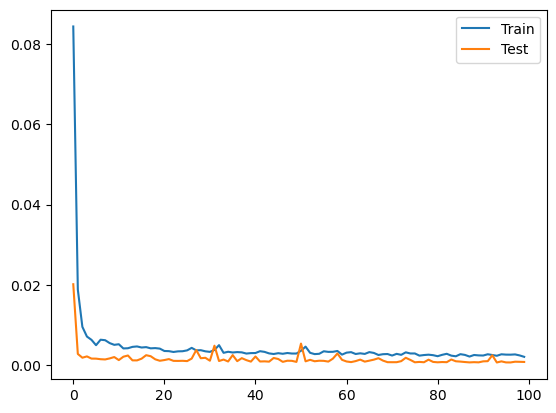

In [34]:
plt.plot(range(100),bilstm.history['loss'],label='Train')
plt.plot(range(100),bilstm.history['val_loss'],label='Test')
plt.legend()

In [35]:
pred=model.predict(x_test)

3/3 [==============================] - 3s 55ms/step


In [36]:
rmse=np.sqrt(mean_squared_error(y_test,pred))
rmse

0.027986620418724694

In [37]:
pred=min_max.inverse_transform(pred)
y_test=y_test.reshape(-1,1)
y_test=min_max.inverse_transform(y_test)

In [38]:
y_test=pd.DataFrame(y_test)
pred=pd.DataFrame(pred)

In [39]:
d=data[['Date']][664:-1]
dd=d.reset_index()

In [40]:
fore=pd.concat([dd,pred,y_test],axis=1)
fore.set_index('Date',inplace=True)

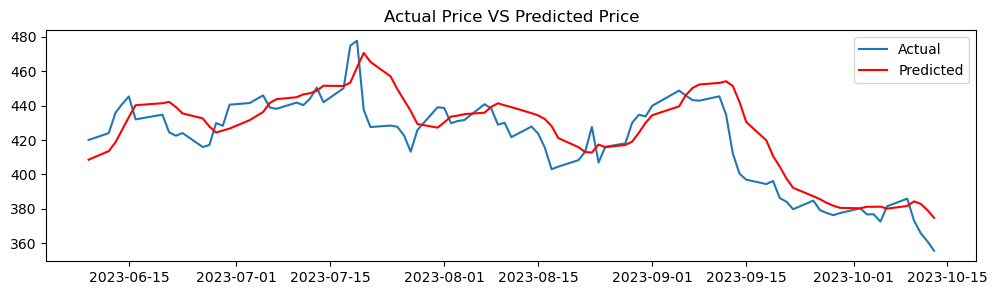

In [41]:
plt.figure(figsize=(12,3))
plt.plot(fore.iloc[:,2],label='Actual')
plt.plot(fore.iloc[:,1],label='Predicted',color='red')
plt.legend()
plt.title('Actual Price VS Predicted Price')
plt.show()

In [42]:
predicted_price = []

def stock_prediction(days):
    t = x_test[-1]
    tt = t.reshape(1, 100, 1)
    p = model.predict(tt)
    predicted_price.append(p[0])

    for i in range(days-1):    
        stockValue_list = list(t)
        stockValue_list.append(p[0])
        testing_array = np.array(stockValue_list[-100:])
        p = model.predict(testing_array.reshape(1, 100, 1))
        predicted_price.append(p[0])
    predicted_pricee=min_max.inverse_transform(predicted_price)
    return predicted_pricee

In [43]:
stock_prediction(20)

1/1 [==============================] - 0s 65ms/step


array([[374.7414564 ],
       [374.72140137],
       [374.71559309],
       [374.71391792],
       [374.71344825],
       [374.71327604],
       [374.71326038],
       [374.71326038],
       [374.71326038],
       [374.71326038],
       [374.71326038],
       [374.71326038],
       [374.71326038],
       [374.71326038],
       [374.71326038],
       [374.71326038],
       [374.71326038],
       [374.71326038],
       [374.71326038],
       [374.71326038]])